In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [2]:
data = loadmat("./data/ex8data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
X = data['X']
Xval, yval = data['Xval'], data['yval']
print(yval)
X.shape, Xval.shape, yval.shape

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


((307, 2), (307, 2), (307, 1))

In [4]:
def plot_data(X):
    plt.figure(figsize=(8, 6))
    plt.plot(X[:, 0], X[:, 1], 'x', color="blue")
    plt.xlabel("Latency(ms)")
    plt.ylabel("Throughput (mb/s)")
    plt.title("The first dataset")

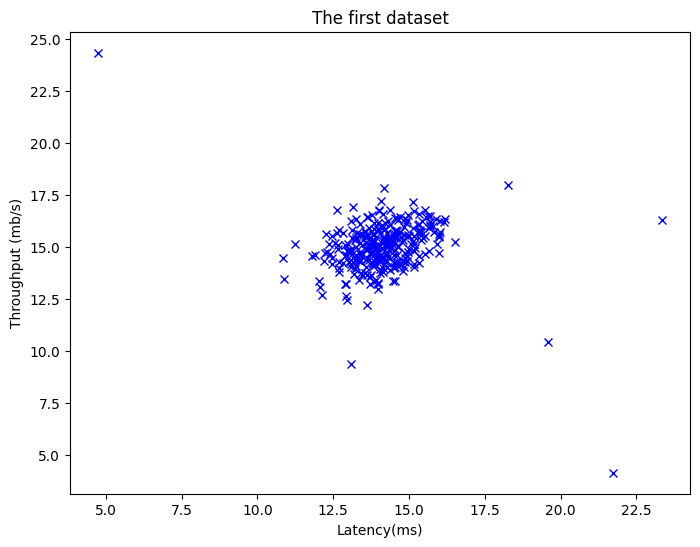

In [5]:
plot_data(X)

In [6]:
def estimateGaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [7]:
mu, sigma = estimateGaussian(X)

In [8]:
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [9]:
def multivariateGausssian(X, mu, sigma):
    # X:(m, n)
    m, n = X.shape
    if(np.ndim(sigma)==1):
        sigma = np.diag(sigma)
    left = 1.0 / (np.power(2 * np.pi, n/2) * np.sqrt(np.linalg.det(sigma)))
    right = np.zeros((m, 1))
    for row in range(m):
        x = X[row]
        right[row] = np.exp(-0.5 * (x-mu).T @ np.linalg.inv(sigma) @ (x-mu))
    return left*right

In [10]:
def plotContours(X, mu, sigma, fig=None, ax=None):
    xplot = np.linspace(0, 25, 100)
    yplot = np.linspace(0, 25, 100)
    
    Xplot, Yplot = np.meshgrid(xplot, yplot)
    
    Z = multivariateGausssian(np.column_stack((Xplot.flatten(), Yplot.flatten())), mu, sigma).reshape(Xplot.shape)
    
    contour = ax.contour(Xplot, Yplot, Z, [10**(-i) for i in range(20, 0, -3)], colors='k')
    
    ax.plot(X[:, 0], X[:, 1], 'x', color="blue")

In [11]:
p = multivariateGausssian(X, mu, sigma)

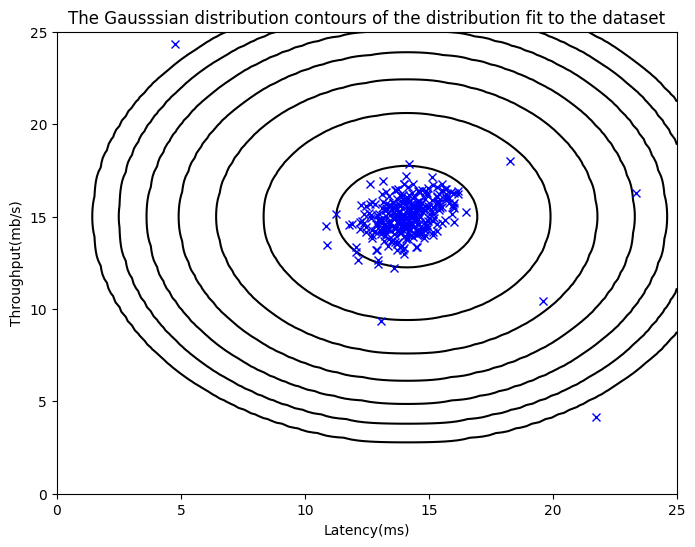

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plotContours(X, mu, sigma, fig, ax)
ax.set_xlabel("Latency(ms)")
ax.set_ylabel("Throughput(mb/s)")
ax.set_title("The Gausssian distribution contours of the distribution fit to the dataset")
plt.show()

In [13]:
from scipy import stats

In [14]:
pval = multivariateGausssian(Xval, mu, sigma)

In [15]:
dist = stats.norm(mu[0], sigma[0])
dist.pdf(15)

0.1935875044615038

In [16]:
def selectThreshold(pval, yval):
    best_e, best_f1, f1 = 0, 0, 0
    step = (pval.max() - pval.min()) / 1000
    for e in np.arange(pval.min(), pval.max(), step):
        preds = pval < e
        tp = np.sum(np.logical_and(preds==1, yval==1))
        fp = np.sum(np.logical_and(preds==1, yval==0))
        fn = np.sum(np.logical_and(preds==0, yval==1))
        tn = np.sum(np.logical_and(preds==0, yval==0))
        precision = tp / (tp + fp)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        if(f1 > best_f1):
            best_f1 = f1
            best_e = e
    return best_e, best_f1

In [17]:
epsilon, f1 = selectThreshold(pval, yval)
epsilon, f1

/tmp/ipykernel_3808/3121152560.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


(8.990852779269496e-05, 0.8750000000000001)

In [18]:
p = multivariateGausssian(X, mu, sigma)
out_index = np.where(p < epsilon)
out_index

(array([300, 301, 303, 304, 305, 306]), array([0, 0, 0, 0, 0, 0]))

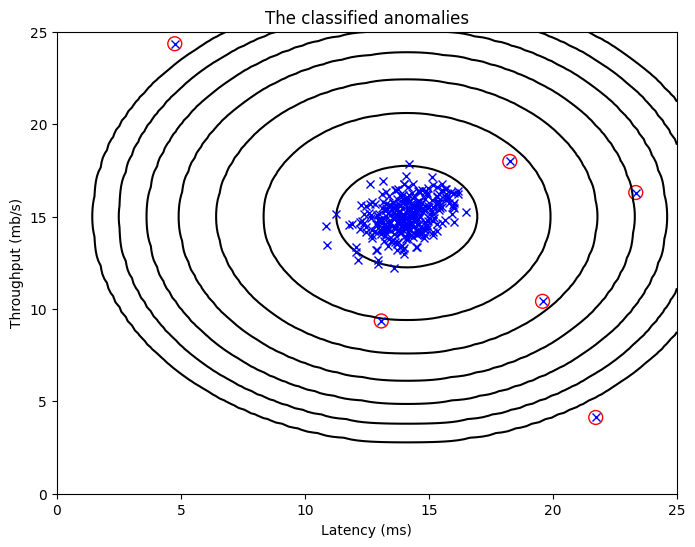

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
plotContours(X, mu, sigma, fig, ax)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")
plt.title("The classified anomalies")
plt.scatter(X[out_index[0], 0], X[out_index[0], 1], s=100, facecolors="none", edgecolors="r")
plt.show()

In [20]:
data2 = loadmat("./data/ex8data2.mat")
X = data2['X']
Xval, yval = data2['Xval'], data2['yval']
X.shape, Xval.shape, yval.shape

((1000, 11), (100, 11), (100, 1))

In [21]:
mu, sigma2 = estimateGaussian(X)
p = multivariateGausssian(X, mu, sigma2)
pval = multivariateGausssian(Xval, mu, sigma2)
epsilon, f1 = selectThreshold(pval, yval)
epsilon, f1

/tmp/ipykernel_3808/3121152560.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


(1.377228890761358e-18, 0.6153846153846154)

In [22]:
out_index = np.where(p < epsilon)
len(out_index[0])

117

In [23]:
df = pd.read_excel("./data/addata1.xlsx", "Sheet1", index_col=None, na_values=["NA"])

In [24]:
df_test = pd.read_excel("./data/adtest1.xlsx", "Sheet1", index_col=None, na_values=["NA"])

In [25]:
df.head()

,Unnamed: 0,pubpeer_id,title,comments_total,journals,published_time,author_1,author_1_id,link,affiliation,...,situation,rawcommentstext,comments,my_prediction_NEU,my_prediction_POS,my_prediction_NEG,total_comment,author_reply,author_active,reword
0,0,8135B7AF7FE9AAA2118BFB886338B8,A decrease in remodeling accounts for the accu...,1,Journal of Biological Chemistry,2001,Alfred N. Fonteh,24080801.0,/publications/8135B7AF7FE9AAA2118BFB886338B8#1,"Department of Internal Medicine, Pulmonary and...",...,0,[' Lots of dots are unexpected similar in diff...,0.998709,0.962937,0.028334,0.008729,1,0,0.0,0.982077
1,1,813720AFDB31A97EF1407055A5866F,Wnt/Frizzled activation of Rho regulates verte...,1,Cell,2001,Raymond Habas,25599003.0,/publications/813720AFDB31A97EF1407055A5866F#1,"Division of Neuroscience, Children's Hospital,...",...,0,[' Figure 1B: Possible splicing in GST-PBD ban...,0.998709,0.788885,0.009303,0.201812,1,0,0.0,2.877901
2,2,81446758FF6A8440A1945530F7E816,The Basolateral amygdala → Nucleus Accumbens c...,0,bioRxiv,2020,Mickaël Puaud,28837057.0,/publications/81446758FF6A8440A1945530F7E816#0,NaN,...,0,[],0.998709,0.865983,0.128247,0.005771,0,0,0.0,0.000000
3,3,81455657F7725EDA7302CAD5A0C9F6,"A novel derivative of betulinic acid, SYK023, ...",11,Oncotarget,2015,Tsung-I Hsu,21458.0,/publications/81455657F7725EDA7302CAD5A0C9F6#12,Center for Infection Disease and Signal Resear...,...,0,"['null, ', 'null, ', 'null, ', 'null, ', ' Two...",0.998709,0.413486,0.006213,0.580301,12,0,0.0,32.223821
4,4,8145BCB148FAD05C86A2903E0A1241,CIPK11-Dependent Phosphorylation Modulates FIT...,6,Developmental Cell,2019,Regina Gratz,29426126.0,/publications/8145BCB148FAD05C86A2903E0A1241#6,"Institute of Botany, Heinrich-Heine University...",...,0,"[' Figure 1A, much more similar than expected ...",0.998709,0.860576,0.017709,0.121715,6,3,0.5,13.019097


In [26]:
select_column = ["reword", "my_prediction_NEU"]
X = df[select_column]
X

,reword,my_prediction_NEU
0,0.982077,0.962937
1,2.877901,0.788885
2,0.000000,0.865983
3,32.223821,0.413486
4,13.019097,0.860576
...,...,...
3607,0.948133,0.643233
3608,7.560111,0.220461
3609,10.067319,0.969676
3610,59.197818,0.971913


In [27]:
mu, sigma2 = estimateGaussian(X.to_numpy())

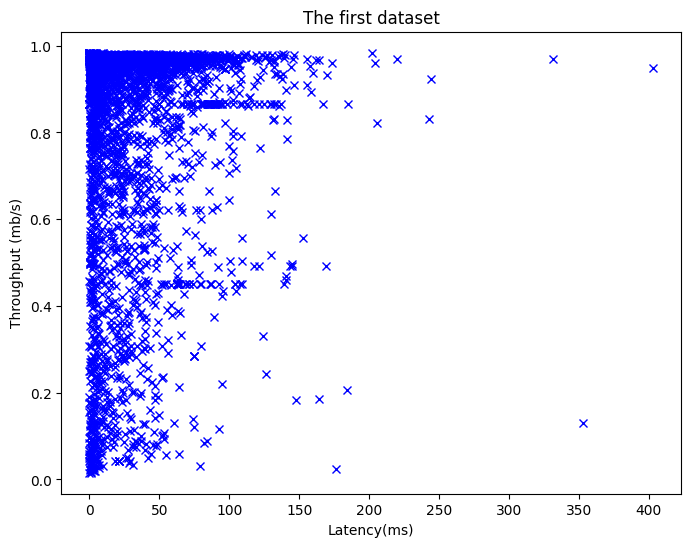

In [28]:
plot_data(X.to_numpy())

In [29]:
X = X.to_numpy()

In [30]:
sigma2, mu

(array([1.1427894e+03, 6.6111827e-02]), array([28.13234713,  0.79587696]))

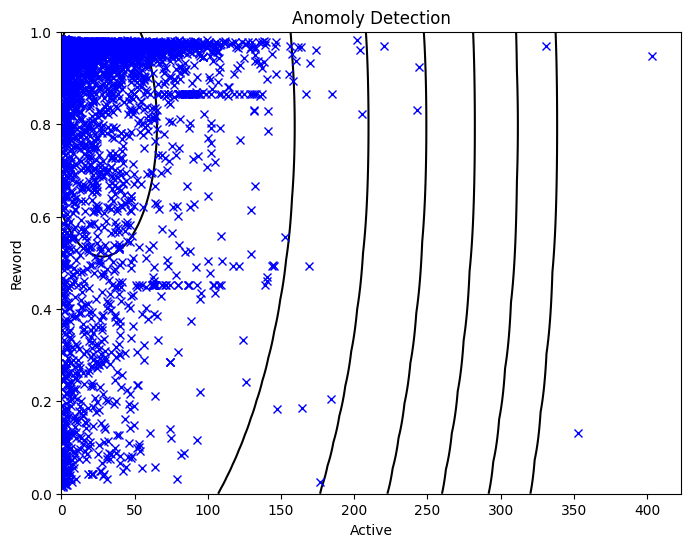

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

xplot = np.linspace(0, 400, 100)
yplot = np.linspace(0, 1, 100)

Xplot, Yplot = np.meshgrid(xplot, yplot)

Z = multivariateGausssian(np.column_stack((Xplot.flatten(), Yplot.flatten())), mu[:2], sigma2[:2]).reshape(Xplot.shape)

contour = ax.contour(Xplot, Yplot, Z, [10**(-i) for i in range(20, 0, -3)], colors='k')

ax.plot(X[:, 0], X[:, 1], 'x', color="blue")

ax.set_xlabel("Active")
ax.set_ylabel("Reword")
ax.set_title("Anomoly Detection")
plt.show()

In [32]:
X_val = df_test[select_column]
X_val.head()

,reword,my_prediction_NEU
0,0.000000,0.967764
1,47.096213,0.689689
2,0.000000,0.967764
3,6.623317,0.033136
4,0.000000,0.865983


In [33]:
yval = df_test["situation"]
yval

0      0
1      0
2      0
3      0
4      0
      ..
897    1
898    1
899    1
900    1
901    1
Name: situation, Length: 902, dtype: int64

In [34]:
X_val.shape, yval.shape

((902, 2), (902,))

In [35]:
X_val = X_val.to_numpy()

In [36]:
pval = multivariateGausssian(X_val, mu, sigma2)
epsilon, acu = selectThreshold(pval, yval)
epsilon, acu

/tmp/ipykernel_3808/3121152560.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


(0.018280290914202104, 0.6472104033079642)

In [37]:
preds = pval < epsilon
tp = np.sum(np.logical_and(preds==1, yval==1))
fp = np.sum(np.logical_and(preds==1, yval==0))
fn = np.sum(np.logical_and(preds==0, yval==1))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)

precision, recall, f1

(0.4789356984478936, 0.9977827050997783, 0.6472104033079642)